# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [24]:
# Step 1:Import the necessary libraries

import pandas as pd


# Step 2: Import the dataset from the provided address
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

# Display the DataFrame as a table
print(users.head())

# Calculate the mean age per occupation
# Check the data type of the 'age' column
print(users.dtypes)

# Convert the 'age' column to numeric
users['age'] = pd.to_numeric(users['age'], errors='coerce')

# Recalculate the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nMean age per occupation:")
print(mean_age_per_occupation)


# Pivot the data to get count of males and females per occupation
male_female_counts = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

# Calculate male ratio per occupation
male_female_counts['male_ratio'] = male_female_counts['M'] / (male_female_counts['M'] + male_female_counts['F'])

# Sort the male ratio from most to least
male_ratio_sorted = male_female_counts['male_ratio'].sort_values(ascending=False)
print("\nMale ratio per occupation (sorted from most to least):")
print(male_ratio_sorted)

# For each occupation, calculate the minimum and maximum ages
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and maximum ages per occupation:")
print(min_max_age_per_occupation)

# For each combination of occupation and sex, calculate the mean age
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age per combination of occupation and sex:")
print(mean_age_per_combination)

# For each occupation present the percentage of women and men
# Calculate total count of each gender per occupation
gender_counts_per_occupation = users.groupby(['occupation', 'gender']).size()

# Calculate total count of all genders per occupation
total_counts_per_occupation = users.groupby('occupation').size()

# Calculate percentage of women and men for each occupation
percentage_per_occupation = (gender_counts_per_occupation / total_counts_per_occupation * 100).unstack()
print("\nPercentage of women and men per occupation:")
print(percentage_per_occupation)

   user_id  age  gender  occupation  zip_code
0  user_id  age  gender  occupation  zip_code
1        1   24       M  technician     85711
2        2   53       F       other     94043
3        3   23       M      writer     32067
4        4   24       M  technician     43537
user_id       object
age           object
gender        object
occupation    object
zip_code      object
dtype: object

Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
occupation             NaN
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
w

# Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [25]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from the provided address
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4. Select only the Goal column
goals = euro12['Goals']

# Step 5. How many teams participated in the Euro2012?
num_teams = euro12.shape[0]
print("Number of teams participated in Euro2012:", num_teams)

# Step 6. What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print("Number of columns in the dataset:", num_columns)

# Step 7. View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8. Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

# Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per team:", mean_yellow_cards)

# Step 10. Filter teams that scored more than 6 goals
teams_more_than_six_goals = euro12[euro12['Goals'] > 6]

# Step 11. Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12. Select the first 7 columns
first_seven_columns = euro12.iloc[:, :7]

# Step 13. Select all columns except the last 3
all_except_last_three_columns = euro12.iloc[:, :-3]

# Step 14. Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy_selected_countries = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]


Number of teams participated in Euro2012: 16
Number of columns in the dataset: 35
Mean Yellow Cards given per team: 7.4375


# Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [26]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3. Create a DataFrame by joining the Series by column
data = {'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3}
df = pd.DataFrame(data)

# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5. Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0)

# Step 6. Check if it is going only until index 99
print(bigcolumn.index)

# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', length=300)


# Question 4

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [5]:
import pandas as pd

# Step 2: Import the dataset
file_path = r'C:\Users\marge\Downloads\wind.txt'

# Step 3: Read the CSV file into a DataFrame and set proper datetime index
data = pd.read_csv(file_path, delim_whitespace=True, parse_dates={'Date': ['Yr', 'Mo', 'Dy']}, date_format='%y %m %d')
data.set_index('Date', inplace=True)

# Step 4: Fix the year
def fix_year(x):
    if x.year > 2000:
        return x - pd.DateOffset(years=100)
    else:
        return x

data.index = data.index.map(fix_year)

# Step 6: Compute how many values are missing for each location over the entire record
missing_values = data.isnull().sum()

# Step 7: Compute how many non-missing values there are in total
non_missing_values_count = data.notnull().sum().sum()

# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.stack().mean()

# Step 9: Create a DataFrame called loc_stats and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days
loc_stats = data.describe(percentiles=[]).transpose()

# Step 10: Create a DataFrame called day_stats and calculate the min, max, mean, and standard deviations of the windspeeds across all the locations at each day
day_stats = data.describe(percentiles=[]).transpose()

# Step 11: Find the average windspeed in January for each location
january_avg_windspeed = data[data.index.month == 1].mean()

# Step 12: Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()

# Step 13: Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()

# Step 14: Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()

# Step 15: Calculate the min, max, mean, and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2, 1961) for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]

print("Step 6: Missing values for each location over the entire record:")
print(missing_values)
print("\nStep 7: Total non-missing values in the dataset:")
print(non_missing_values_count)
print("\nStep 8: Mean windspeed over all locations and times:", mean_windspeed)
print("\nStep 9: Min, max, mean, and standard deviations of windspeeds at each location:")
print(loc_stats)
print("\nStep 10: Min, max, mean, and standard deviations of windspeeds across all locations at each day:")
print(day_stats)
print("\nStep 11: Average windspeed in January for each location:")
print(january_avg_windspeed)
print("\nStep 12: Yearly frequency data for each location:")
print(yearly_data)
print("\nStep 13: Monthly frequency data for each location:")
print(monthly_data)
print("\nStep 14: Weekly frequency data for each location:")
print(weekly_data)
print("\nStep 15: Min, max, mean, and standard deviations of windspeeds across all locations for each week (first 52 weeks):")
print(weekly_stats)


Step 6: Missing values for each location over the entire record:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7: Total non-missing values in the dataset:
78857

Step 8: Mean windspeed over all locations and times: 10.22788376428218

Step 9: Min, max, mean, and standard deviations of windspeeds at each location:
      count       mean       std   min    50%    max
RPT  6568.0  12.362987  5.618413  0.67  11.71  35.80
VAL  6571.0  10.644314  5.267356  0.21  10.17  33.37
ROS  6572.0  11.660526  5.008450  1.50  10.92  33.84
KIL  6569.0   6.306468  3.605811  0.00   5.75  28.46
SHA  6572.0  10.455834  4.936125  0.13   9.96  37.54
BIR  6574.0   7.092254  3.968683  0.00   6.83  26.16
DUB  6571.0   9.797343  4.977555  0.00   9.21  30.37
CLA  6572.0   8.495053  4.499449  0.00   8.08  31.08
MUL  6571.0   8.493590  4.166872  0.00   8.17  25.88
CLO  6573.0   8.707332  4.503954  0.04   8.29  28.21
BEL  6574.0  13.121007

# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [2]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from the provided address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print(chipo.head(10))

# Step 5: What is the number of observations in the dataset?
num_observations = len(chipo)
print("Number of observations:", num_observations)

# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

# Step 7: Print the name of all the columns
print("Column names:", chipo.columns.tolist())

# Step 8: How is the dataset indexed?
print("Index:", chipo.index)

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

# Step 10: For the most-ordered item, how many items were ordered?
num_most_ordered = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of", most_ordered_item, "ordered:", num_most_ordered)

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered item in choice_description:", most_ordered_choice)

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

# Step 13: Turn the item price into a float
chipo['item_price'] = chipo['item_price'].replace({'\$':''}, regex = True).astype(float)

# Check the item price type
print("Type of item price:", chipo['item_price'].dtype)

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

# Step 16: What is the average revenue amount per order?
avg_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", avg_revenue_per_order)

# Step 17: How many different items are sold?
num_unique_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_unique_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


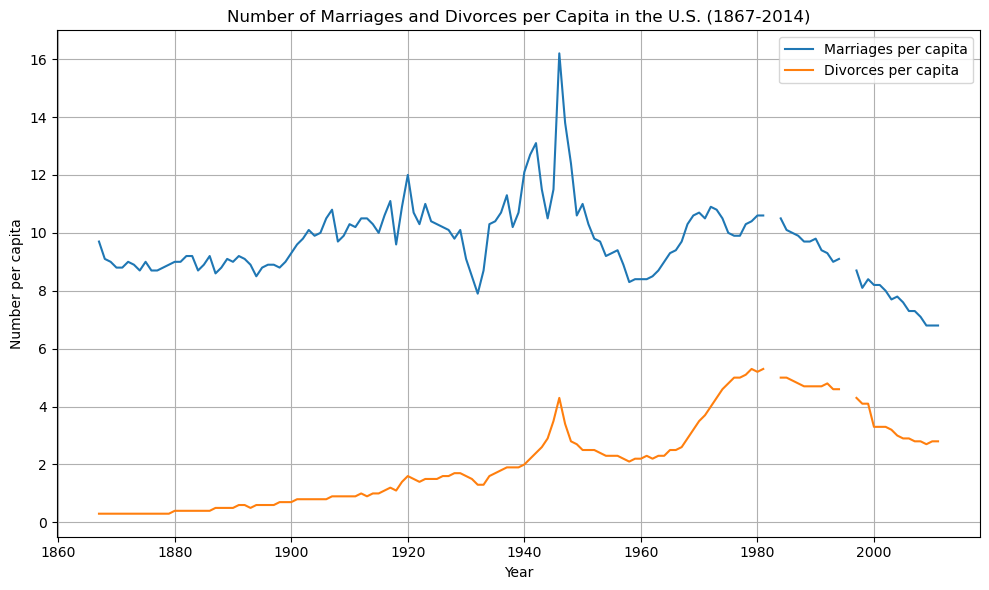

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
file_path = r'C:\Users\marge\Downloads\us-marriages-divorces-1867-2014.csv'

# Step 2: Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Step 3: Filter the data for the desired years (1867 to 2014)
data_filtered = data[(data['Year'] >= 1867) & (data['Year'] <= 2014)]

# Step 4: Create a line plot
plt.figure(figsize=(10, 6))

plt.plot(data_filtered['Year'], data_filtered['Marriages_per_1000'], label='Marriages per capita')
plt.plot(data_filtered['Year'], data_filtered['Divorces_per_1000'], label='Divorces per capita')

# Step 5: Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Step 6: Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

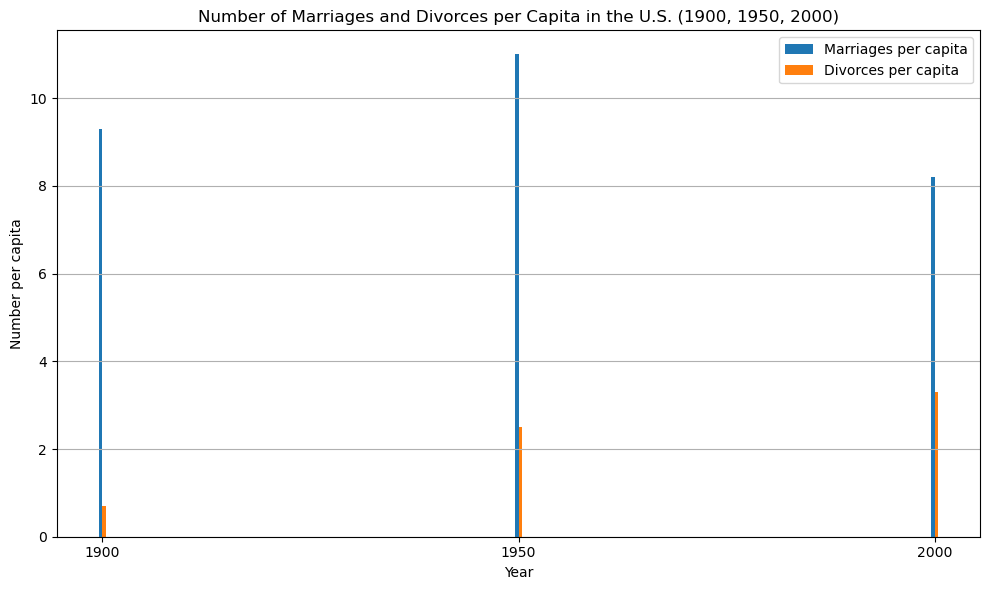

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
file_path = r'C:\Users\marge\Downloads\us-marriages-divorces-1867-2014.csv'

# Step 2: Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Step 3: Filter the data for the desired years (1900, 1950, and 2000)
years = [1900, 1950, 2000]
data_filtered = data[data['Year'].isin(years)]

# Step 4: Create a vertical bar chart
plt.figure(figsize=(10, 6))

plt.bar(data_filtered['Year'] - 0.2, data_filtered['Marriages_per_1000'], width=0.4, label='Marriages per capita')
plt.bar(data_filtered['Year'] + 0.2, data_filtered['Divorces_per_1000'], width=0.4, label='Divorces per capita')

# Step 5: Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.legend()

# Step 6: Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

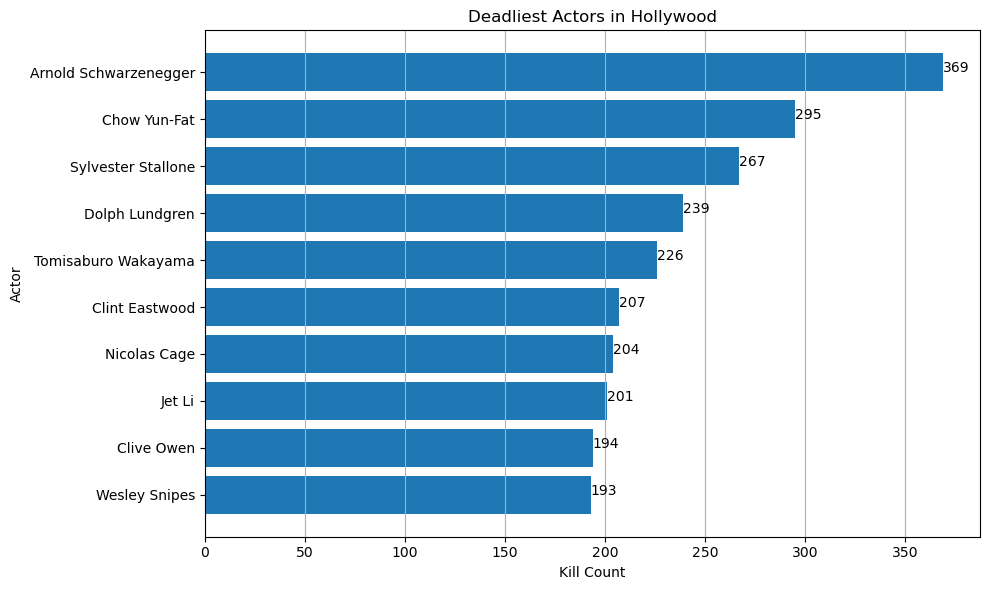

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
file_path = r'C:\Users\marge\Downloads\actor_kill_counts.csv'

# Step 2: Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Step 3: Sort the data by kill count in descending order
data_sorted = data.sort_values(by='Count', ascending=True)

# Step 4: Create a horizontal bar chart
plt.figure(figsize=(10, 6))

plt.barh(data_sorted['Actor'], data_sorted['Count'])

# Step 5: Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Step 6: Add labels to each bar
for index, value in enumerate(data_sorted['Count']):
    plt.text(value, index, str(value))

# Step 7: Show the plot
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories

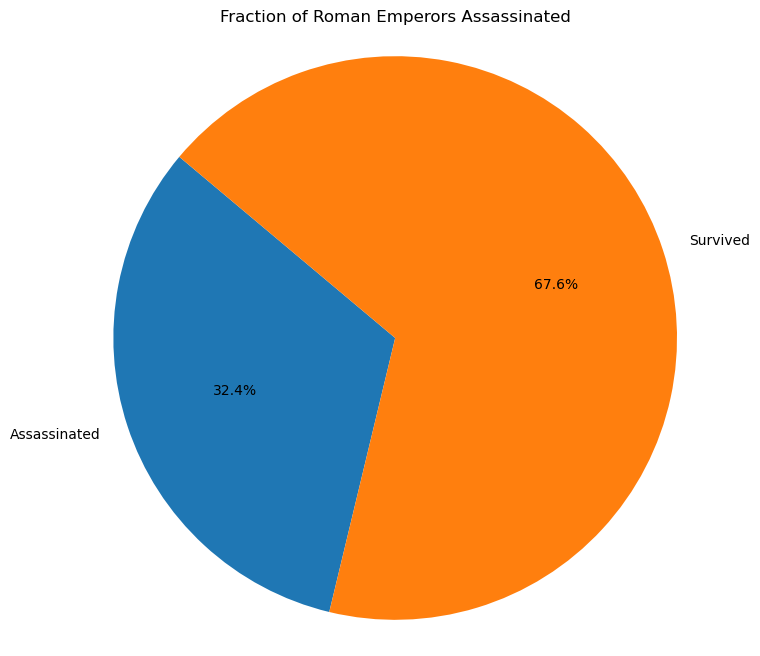

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
file_path = r'C:\Users\marge\Downloads\roman-emperor-reigns.csv'

# Step 2: Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Step 3: Count the number of assassinated emperors
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
num_assassinated_emperors = len(assassinated_emperors)

# Step 4: Count the number of total emperors
total_emperors = len(data)

# Step 5: Calculate the fraction of assassinated emperors
fraction_assassinated = num_assassinated_emperors / total_emperors

# Step 6: Calculate the fraction of non-assassinated emperors
fraction_survived = 1 - fraction_assassinated

# Step 7: Create labels for the categories
labels = ['Assassinated', 'Survived']

# Step 8: Create values for the categories
sizes = [fraction_assassinated, fraction_survived]

# Step 9: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Step 10: Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Step 11: Add title
plt.title('Fraction of Roman Emperors Assassinated')

# Step 12: Show the plot
plt.show()


# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label you
r axes!
Color each dot according to its year.

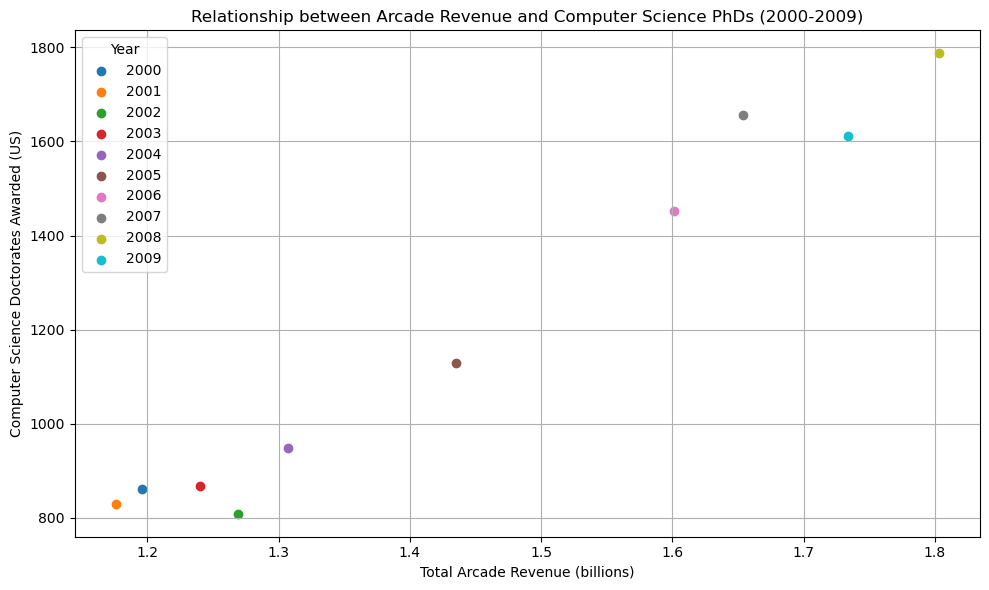

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
file_path = r'C:\Users\marge\Downloads\arcade-revenue-vs-cs-doctorates.csv'

# Step 2: Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Step 3: Filter the data for the years 2000 to 2009
data_filtered = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

# Step 4: Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded points for each year
for year in range(2000, 2010):
    year_data = data_filtered[data_filtered['Year'] == year]
    plt.scatter(year_data['Total Arcade Revenue (billions)'], year_data['Computer Science Doctorates Awarded (US)'], label=year)

# Step 5: Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.legend(title='Year')

# Step 6: Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
